#### Import basic required libraries and read the data in the file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
# Surpass Warnings
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("happiness_data.csv")

### Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical? 

In [2]:
# Summarize the data
data.sample(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1064,Mali,2008,4.115,7.607,0.747,47.16,0.495,-0.012,0.918,0.682,0.164
827,Italy,2018,6.517,10.650,0.913,73.60,0.650,-0.021,0.888,0.649,0.403
115,Bahrain,2017,6.227,10.771,0.876,68.50,0.906,0.136,NaN,0.814,0.290
422,Croatia,2020,6.508,10.166,0.923,71.40,0.837,-0.063,0.961,0.743,0.286
118,Bangladesh,2006,4.319,7.783,0.672,59.02,0.612,0.068,0.786,0.600,0.321
18,Albania,2014,4.814,9.378,0.626,67.52,0.735,-0.025,0.883,0.685,0.335
1884,Venezuela,2011,6.580,9.822,0.931,65.74,0.766,-0.226,0.772,0.828,0.199
1272,Nigeria,2012,5.493,8.543,0.818,47.12,0.652,0.066,0.900,0.811,0.209
137,Belarus,2010,5.526,9.758,0.918,62.30,0.700,-0.163,0.706,0.567,0.208
739,India,2013,4.428,8.478,0.553,58.30,0.740,0.084,0.832,0.680,0.330


The data contains 1949 observations of 10 attributes/features for various countries. The attributes __*year*__, __*Life Ladder*__, __*Log GDP per capita*__, __*Social support*__, __*Healthy life expectancy at birth*__, __*Freedom to make life choices*__, __*Generosity*__, __*Perceptions of corruption*__, __*Positive affect*__, and __*Negative affect*__ are present in the data.

The attributes __*year*__, __*life ladder*__, __*Log GDP per capita*__, __*Social support*__, __*Healthy life expectancy at birth*__, __*Freedom to make life choices*__, __*Generosity*__, __*Perceptions of corruption*__, __*Positive affect*__, and __*Negative affect*__ are continuous valued attributes.

The attribute __*Country name*__ is a categorical attribute. 


In [3]:
# Statistical values for each attribute
data.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [4]:
# Drop attributes that are not required
data = data.drop(['Country name', 'year', 'Life Ladder'], axis=1)

# Lets fill all the NaN with the mean values
data.sample(10)

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
106,9.575,0.887,65.80,0.854,-0.214,0.457,0.643,0.164
576,10.727,0.921,73.80,0.816,-0.138,0.582,0.767,0.282
829,10.563,0.890,74.00,0.718,-0.150,0.844,0.670,0.311
70,10.733,0.967,72.30,0.945,0.369,0.382,0.816,0.195
311,6.785,0.290,44.90,0.624,0.033,0.859,0.579,0.494
710,10.108,0.930,64.60,0.697,NaN,0.903,0.675,0.290
42,10.112,0.889,67.48,0.816,-0.174,0.755,0.840,0.232
1033,7.344,0.647,57.90,0.545,-0.041,0.861,0.802,0.226
1186,8.408,0.793,58.40,0.877,0.679,0.607,0.804,0.302
733,8.204,0.569,56.14,0.729,-0.051,0.862,0.668,0.253


In [5]:
# Number of missing data in the dataset
data.isna().sum()

Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [6]:
# Filling missing data with mean value
full_data = data.fillna(data.mean())
full_data.isna().sum()

Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

### Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require? 

HISTOGRAM REPRESENTATION OF ALL ATTRIBUTES


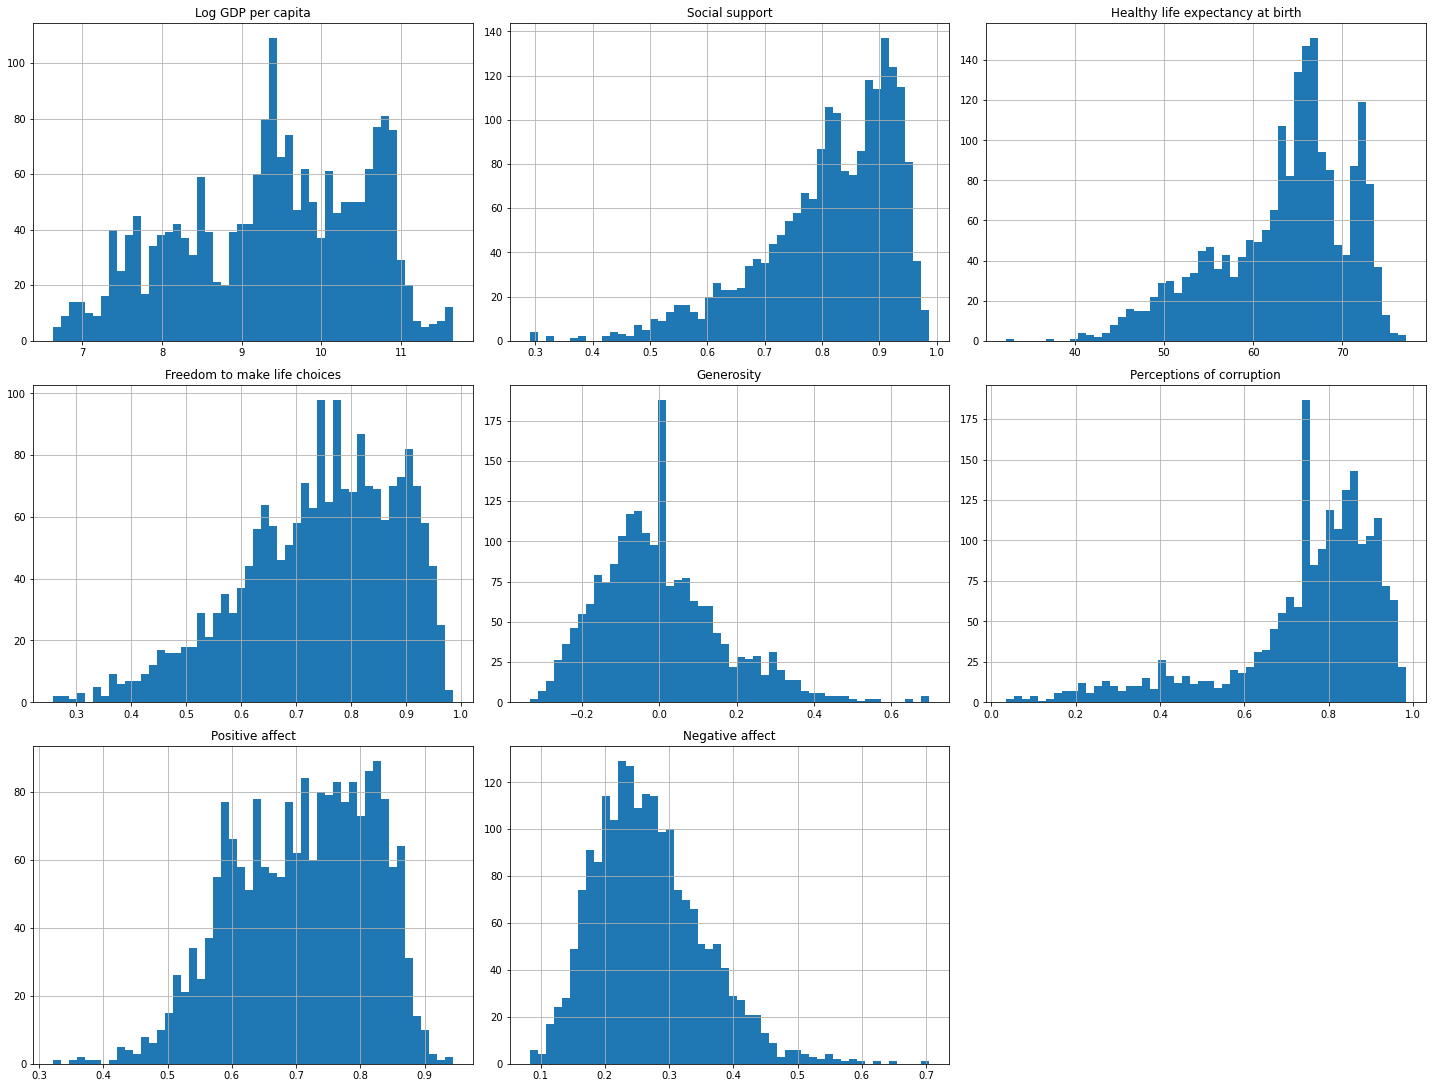

BOXPLOT REPRESENTATION OF ALL ATTRIBUTES


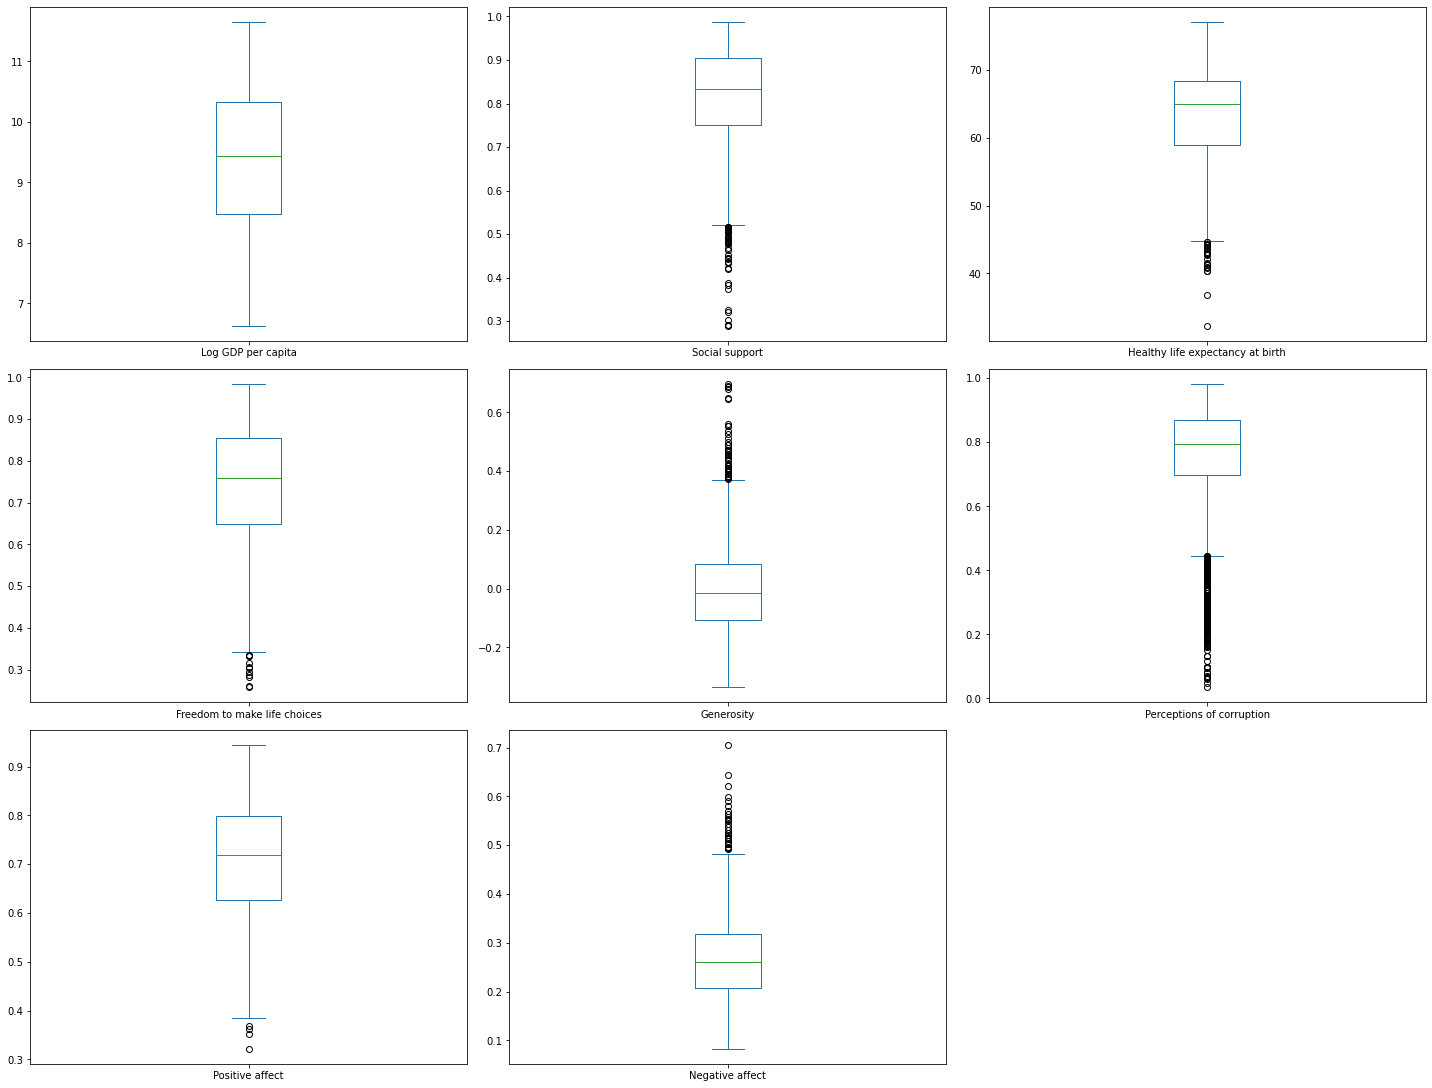

In [7]:
# Plot histograms for each attribute
print('HISTOGRAM REPRESENTATION OF ALL ATTRIBUTES')
full_data.hist(bins=50,layout=(4,3),figsize = (20,20))
plt.tight_layout()
plt.show()

print('BOXPLOT REPRESENTATION OF ALL ATTRIBUTES')
# Plot boxplot for each attribute
full_data.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(20,20))
plt.tight_layout()
plt.show()

The statistical values for each attribute show the mean, standard deviation, minimum, and maximum values for each attribute. The histograms and boxplots give us a visual representation of the distribution of the data for each attribute.

From the histograms and boxplots, we can see that some of the attributes have a skewed distribution, such as __*Log GDP per capita*__. This skewed distribution might impact the accuracy of the regression models, so we may need to apply some transformations to the data to make it more normally distributed.

Additionally, some of the attributes may have outliers, such as __*Generosity*__, which may also impact the accuracy of the regression models. These outliers may need to be handled with special treatment, such as removing them from the data or transforming the data to minimize their impact.

In conclusion, the attributes __*Log GDP per capita*__ and __*Generosity*__ might require special treatment, such as transforming the data to make it more normally distributed and handling outliers.

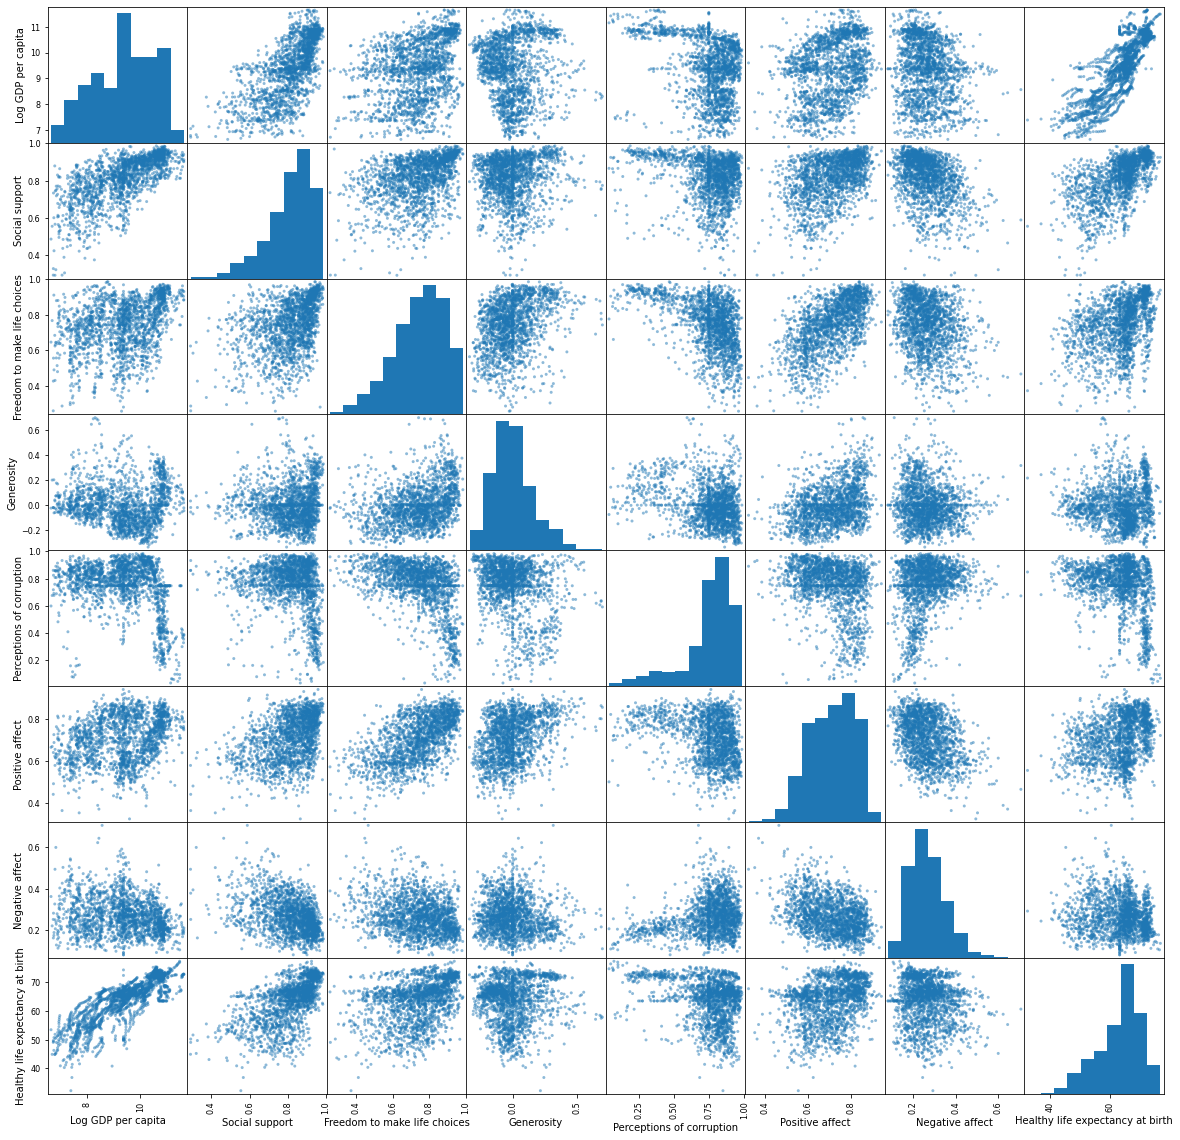

In [8]:
# Check for correlation between the attributes
attributes = ['Log GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect','Healthy life expectancy at birth']
pd.plotting.scatter_matrix(full_data[attributes], figsize=(20, 20))
plt.show()

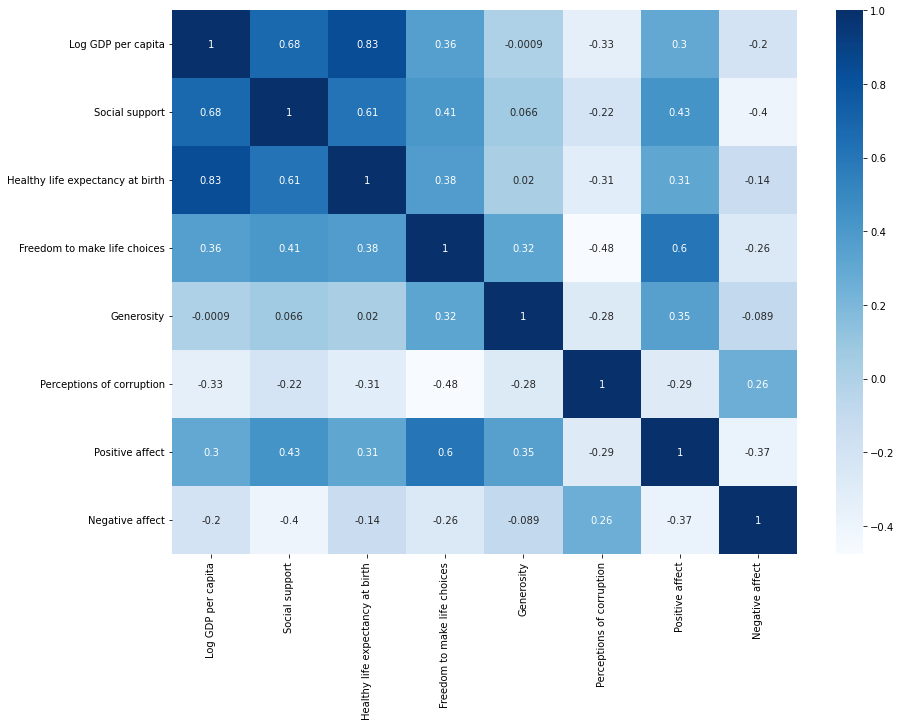

In [9]:
plt.subplots(figsize=(14, 10))
sns.heatmap(full_data.corr(method='pearson'), cmap="Blues", annot=True)
plt.show()

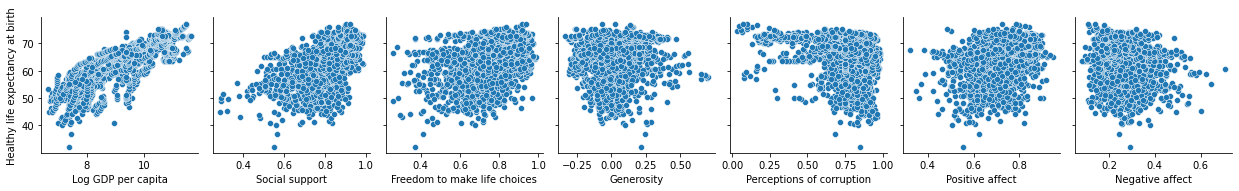

In [10]:
# Generate scatter plots to visualize relationships between the data attributes
sns.pairplot(full_data, x_vars=['Log GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect'], y_vars='Healthy life expectancy at birth')
plt.show()

In [11]:
# Compute Pearson Correlation Coefficient
full_data.corr(method='pearson')

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Log GDP per capita,1.000000,0.682438,0.834455,0.361404,-0.000901,-0.333645,0.297011,-0.204615
Social support,0.682438,1.000000,0.613854,0.408765,0.065510,-0.216028,0.430414,-0.395676
Healthy life expectancy at birth,0.834455,0.613854,1.000000,0.382536,0.020276,-0.311815,0.313989,-0.135599
Freedom to make life choices,0.361404,0.408765,0.382536,1.000000,0.319785,-0.476264,0.602743,-0.264397
Generosity,-0.000901,0.065510,0.020276,0.319785,1.000000,-0.278440,0.349683,-0.088906
Perceptions of corruption,-0.333645,-0.216028,-0.311815,-0.476264,-0.278440,1.000000,-0.290161,0.257595
Positive affect,0.297011,0.430414,0.313989,0.602743,0.349683,-0.290161,1.000000,-0.372901
Negative affect,-0.204615,-0.395676,-0.135599,-0.264397,-0.088906,0.257595,-0.372901,1.000000


From the Pearson Correlation Coefficient (PCC), we can see the correlation between each attribute and the target label __*Healthy life expectancy*__. The PCC ranges from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.

From the scatter plots, we can visualize the relationships between the data attributes and the target label. Some of the attributes, such as __*Social support*__ and __*Freedom to make life choices*__, have a strong positive correlation with the target label, while others, such as __*Negative affect*__, have a strong negative correlation.

In conclusion, the relationships between the data attributes and the target label can be seen through the Pearson Correlation Coefficient (PCC) and scatter plots. The attributes __*Social support*__ and __*Freedom to make life choices*__ have a strong positive correlation with the target label, while __*Negative affect*__ has a strong negative correlation. 

### Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset. 

We can select 20% of the data for testing using the __*train_test_split*__ function from the __*sklearn.model_selection*__ module. The function randomly splits the data into training and testing sets, and we can specify the size of the test set as 20% of the data by setting the test_size parameter to 0.2.

In [12]:
# Split the data into training and test sets
new_data=full_data
X = new_data.drop('Healthy life expectancy at birth', axis=1)
y = new_data['Healthy life expectancy at birth']

# Import train_test_split module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Verify that your test portion of the data is representative of the entire dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1559, 7)
(390, 7)
(1559,)
(390,)


In [14]:
X_train.head()

,Log GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1031,7.334,0.673,0.480,-0.019,0.868,0.734,0.241
299,10.744,0.948,0.918,0.290,0.466,0.857,0.229
1227,10.528,0.944,0.893,0.298,0.334,0.854,0.232
1069,7.599,0.820,0.665,-0.053,0.755,0.724,0.193
521,8.986,0.798,0.778,-0.194,0.781,0.837,0.330


To verify that the test portion of the data is representative of the entire dataset, we can compare the mean and standard deviation of the attributes in both the training and testing sets. If they are similar, then we can conclude that the test set is representative of the entire dataset.

### Training set Statistics 

In [15]:
pd.DataFrame(X_train.mean(axis=0),columns = ['Mean'])

,Mean
Log GDP per capita,9.399338
Social support,0.813827
Freedom to make life choices,0.742560
Generosity,0.000959
Perceptions of corruption,0.747226
Positive affect,0.710513
Negative affect,0.267829


In [16]:
pd.DataFrame(X_train.std(axis=0),columns = ['Standard deviation'])

,Standard deviation
Log GDP per capita,1.134252
Social support,0.118292
Freedom to make life choices,0.142836
Generosity,0.158493
Perceptions of corruption,0.181227
Positive affect,0.106659
Negative affect,0.086000


### Test set statistics

In [17]:
pd.DataFrame(X_test.mean(axis=0),columns = ['Mean'])

,Mean
Log GDP per capita,9.244989
Social support,0.807456
Freedom to make life choices,0.742547
Generosity,-0.003320
Perceptions of corruption,0.746723
Positive affect,0.707967
Negative affect,0.271403


In [18]:
pd.DataFrame(X_test.std(axis=0),columns = ['Standard deviation'])

,Standard deviation
Log GDP per capita,1.172490
Social support,0.117270
Freedom to make life choices,0.133167
Generosity,0.158516
Perceptions of corruption,0.182515
Positive affect,0.105939
Negative affect,0.079959


 #### Function for plotting graph

In [19]:
def plot_model(x, y,model_name):
    sns.set(style='whitegrid')
    plt.scatter(x,y)
    plt.title(model_name,fontsize = 14)
    plt.xlabel("Actual Values",fontsize=12)
    plt.ylabel("Predicted Values",fontsize=12)

### Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with closed form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. Display the training and validation loss as a function of training iterations. 

#### Train a linear regression model using the closed form solution (normal equation)

In [20]:
best_model={'Name':[],'MSE':[],'R2 score':[]}

In [21]:
from sklearn.linear_model import LinearRegression

# Performing Linear Regression
reg = LinearRegression().fit(X_train, y_train)
# Testing model with test data
reg_y_pred = reg.predict(X_test)

print('Linear Regression (Closed Form) R2 score:', reg.score(X_test, y_test))
print('Linear Regression (Closed Form) MAE:', metrics.mean_absolute_error(y_test, reg_y_pred))
print('Linear Regression (Closed Form) MSE:', metrics.mean_squared_error(y_test, reg_y_pred))
print('Linear Regression (Closed Form) RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg_y_pred)))
best_model['Name'].append('Linear Regression')
best_model['MSE'].append(metrics.mean_squared_error(y_test, reg_y_pred))
best_model['R2 score'].append(reg.score(X_test, y_test))

df = pd.DataFrame( data = reg.coef_, columns = ['Coefficient'] ,index = X_train.columns)
df

Linear Regression (Closed Form) R2 score: 0.7160449732498693
Linear Regression (Closed Form) MAE: 2.891230255965633
Linear Regression (Closed Form) MSE: 16.04685128934311
Linear Regression (Closed Form) RMSE: 4.005852130239346


,Coefficient
Log GDP per capita,4.776308
Social support,6.034480
Freedom to make life choices,3.249880
Generosity,-1.320803
Perceptions of corruption,-1.258183
Positive affect,3.924307
Negative affect,8.075745


MAE: 2.891230255965633
MSE: 16.04685128934311
RMSE: 4.005852130239346


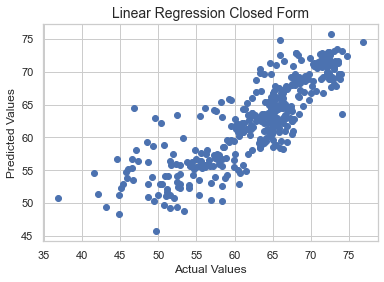

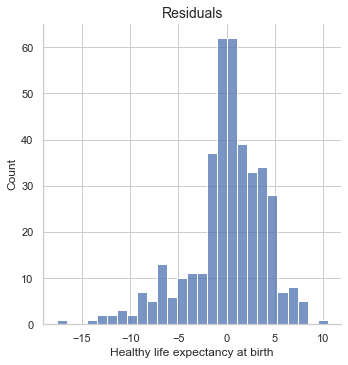

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, reg_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, reg_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg_y_pred)))

plot_model(y_test,reg_y_pred,'Linear Regression Closed Form')
plt.show()

# Plotting Residuals
sns.displot((y_test - reg_y_pred))
plt.title('Residuals',fontsize = 14)
plt.show()

#### 4-fold cross validation on Closed form Linear Regression 

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg, X_train, y_train, cv=4)
print("Closed form solution - Cross validation scores:", scores)
print("Closed form solution - Mean cross-validation score:", np.mean(scores))

Closed form solution - Cross validation scores: [0.74429824 0.71534358 0.68496104 0.67888483]
Closed form solution - Mean cross-validation score: 0.7058719208958578


#### Learning Curve for Closed form Linear Regression

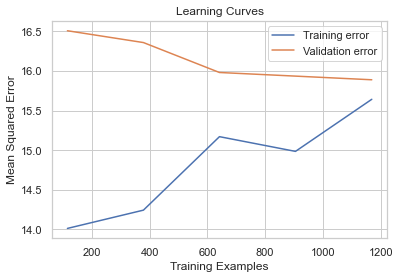

In [24]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(reg, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

#### Train a linear regression model using SGD (Stochastic Gradient Descent)

In [25]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor().fit(X_train, y_train)
sgd_y_pred = sgd.predict(X_test)

print('Linear Regression (SGD) R2 score:', sgd.score(X_test, y_test))
print('Linear Regression (SGD) MAE:', metrics.mean_absolute_error(y_test, sgd_y_pred))
print('Linear Regression (SGD) MSE:', metrics.mean_squared_error(y_test, sgd_y_pred))
print('Linear Regression (SGD) RMSE:', np.sqrt(metrics.mean_squared_error(y_test, sgd_y_pred)))
best_model['Name'].append('SGD')
best_model['MSE'].append(metrics.mean_squared_error(y_test, sgd_y_pred))
best_model['R2 score'].append(sgd.score(X_test, y_test))
df = pd.DataFrame( data = sgd.coef_, columns = ['Coefficient'] ,index = X_train.columns)
df

Linear Regression (SGD) R2 score: 0.7039664585680652
Linear Regression (SGD) MAE: 3.0068347171406744
Linear Regression (SGD) MSE: 16.729431665233456
Linear Regression (SGD) RMSE: 4.090162792021053


,Coefficient
Log GDP per capita,5.535595
Social support,1.843580
Freedom to make life choices,2.997670
Generosity,0.251555
Perceptions of corruption,1.932753
Positive affect,2.686103
Negative affect,1.997233


MAE: 3.0068347171406744
MSE: 16.729431665233456
RMSE: 4.090162792021053


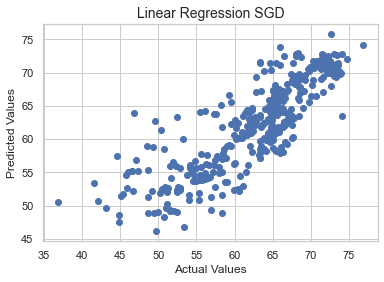

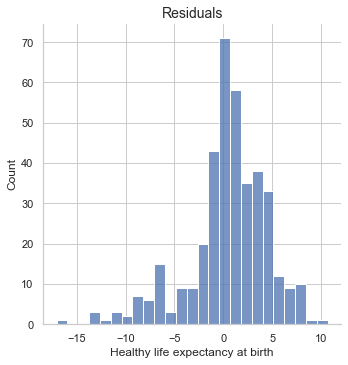

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, sgd_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, sgd_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, sgd_y_pred)))

plot_model(y_test,sgd_y_pred,'Linear Regression SGD')
plt.show()

# Plotting Residuals
sns.displot((y_test - sgd_y_pred))
plt.title('Residuals',fontsize = 14)
plt.show()

#### 4-fold cross validation on SGD Regressor (Stochastic Gradient Descent)

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd, X_train, y_train, cv=4)
print("SGD - Cross validation scores:", scores)
print("SGD - Mean cross-validation score:", np.mean(scores))

SGD - Cross validation scores: [0.71013525 0.70630637 0.68192854 0.65243488]
SGD - Mean cross-validation score: 0.6877012589856939


#### Learning curve for SGD Regressor 

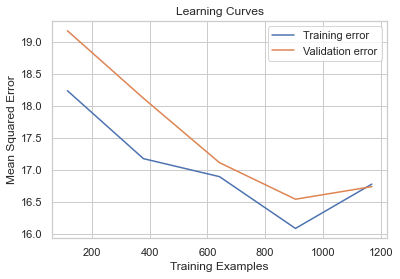

In [28]:
train_sizes, train_scores, test_scores = learning_curve(sgd, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

The results show that the mean cross-validation score of closed form solution and SGD are similar. The test set RMSE for both models are also similar, but the closed form solution has a slightly lower test set RMSE.

#### Perform Ridge regularization

In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5,fit_intercept=True).fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)

print('Ridge Regression R2 score:', ridge.score(X_test, y_test))
best_model['Name'].append('Ridge Regularization')
best_model['MSE'].append(metrics.mean_squared_error(y_test, ridge_y_pred))
best_model['R2 score'].append(ridge.score(X_test, y_test))
df = pd.DataFrame( data = ridge.coef_, columns = ['Coefficient'] ,index = X_train.columns)
df

Ridge Regression R2 score: 0.7161714492101775


,Coefficient
Log GDP per capita,4.801815
Social support,5.657225
Freedom to make life choices,3.269004
Generosity,-1.250353
Perceptions of corruption,-1.183042
Positive affect,3.733352
Negative affect,7.502385


MAE: 2.88925019729437
MSE: 16.039703886636516
RMSE: 4.004959910740245


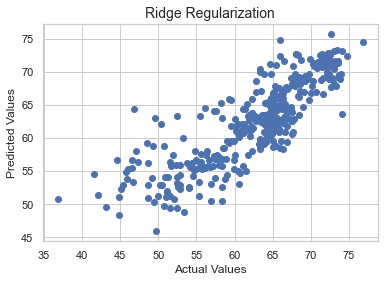

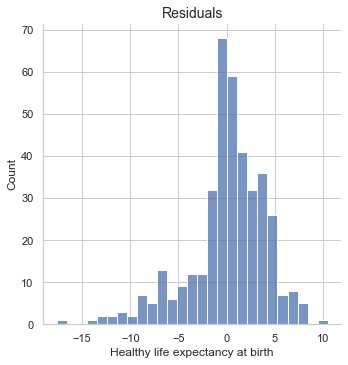

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, ridge_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_y_pred)))

plot_model(y_test,ridge_y_pred,'Ridge Regularization')

# Plotting Residuals
sns.displot((y_test - ridge_y_pred))
plt.title('Residuals',fontsize = 14)
plt.show()

#### Validation curve for Ridge Regularization 

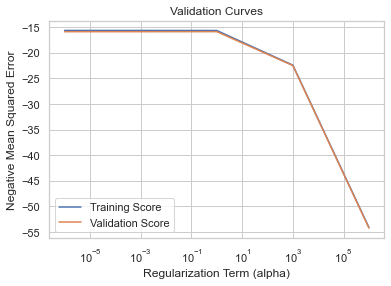

In [31]:
from sklearn.model_selection import validation_curve

# Define the range of values for the regularization term
param_range = np.logspace(-6, 6, 5)

# Calculate the training and validation scores for different values of the regularization term
train_scores, valid_scores = validation_curve(ridge, X_train, y_train, param_name="alpha", param_range=param_range, cv=4, scoring="neg_mean_squared_error")

# Plot the validation curve
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(param_range, np.mean(valid_scores, axis=1), label="Validation Score")
plt.xscale("log")
plt.legend(loc="best")
plt.xlabel("Regularization Term (alpha)")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curves")
plt.show()

#### Learning Curve for Ridge Regularization 

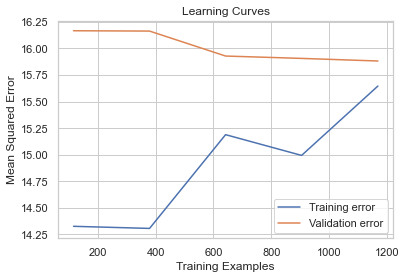

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(ridge, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

#### Lets change the penalty term __*alpha*__ for Ridge Regularization and see the Error changes that happen 

Ridge Regularization R2 score for alpha 0.0: 0.716044973249869
MAE: 2.891230255965633
MSE: 16.046851289343113
RMSE: 4.005852130239347



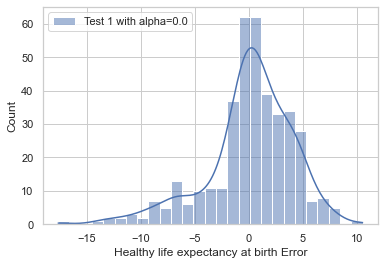

<Figure size 432x288 with 0 Axes>

Ridge Regularization R2 score for alpha 0.2: 0.7161069753730684
MAE: 2.890320426188921
MSE: 16.043347428671975
RMSE: 4.005414763625857



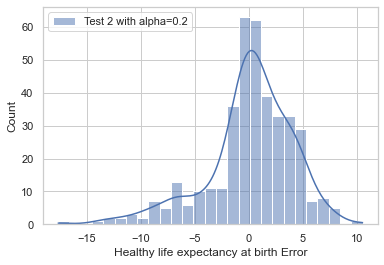

<Figure size 432x288 with 0 Axes>

Ridge Regularization R2 score for alpha 0.4: 0.7161533807012608
MAE: 2.8895192794405777
MSE: 16.04072497324634
RMSE: 4.005087386468158



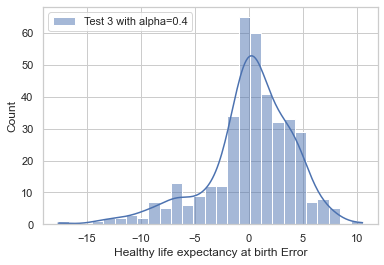

<Figure size 432x288 with 0 Axes>

Ridge Regularization R2 score for alpha 0.7: 0.7161985518830853
MAE: 2.888725474744741
MSE: 16.03817226183426
RMSE: 4.00476869017853



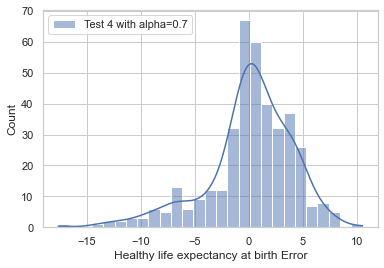

<Figure size 432x288 with 0 Axes>

Ridge Regularization R2 score for alpha 1.0: 0.7162197666117844
MAE: 2.8880647293034114
MSE: 16.036973376220317
RMSE: 4.004619005126495



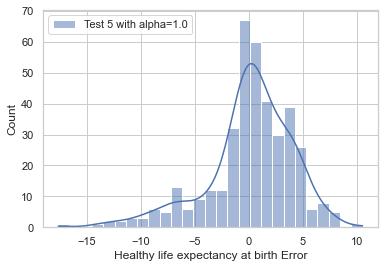

<Figure size 432x288 with 0 Axes>

In [33]:
alpha = [0.0,0.2,0.4,0.7,1.0]
for n,i in enumerate(alpha):
    ridge_dic = {}
    ridge_test = Ridge(alpha=i,fit_intercept=True).fit(X_train, y_train)
    ridge_test_y_pred = ridge_test.predict(X_test)
    name = 'Test {} with alpha={}'.format(n+1,i)
    ridge_dic[name] = y_test-ridge_test_y_pred
    print('Ridge Regularization R2 score for alpha {}: {}'.format(i, ridge_test.score(X_test, y_test)))
    print('MAE:', metrics.mean_absolute_error(y_test, ridge_test_y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, ridge_test_y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_test_y_pred)))
    print()
    ridge_df = pd.DataFrame(ridge_dic)
    sns.set(style="whitegrid")
#     plt.subplots(figsize=(14, 10))
    sns.histplot(ridge_df,kde=True)
    plt.xlabel('Healthy life expectancy at birth Error')
    plt.figure()
    plt.show()

#### Lasso regularization 

In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5).fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)

print('Lasso Regression R2 score:', lasso.score(X_test, y_test))
best_model['Name'].append('Lasso Regularization')
best_model['MSE'].append(metrics.mean_squared_error(y_test, lasso_y_pred))
best_model['R2 score'].append(lasso.score(X_test, y_test))
df = pd.DataFrame( data = lasso.coef_, columns = ['Coefficient'] ,index = X_train.columns)
df

Lasso Regression R2 score: 0.7014476838402925


,Coefficient
Log GDP per capita,5.021718
Social support,0.000000
Freedom to make life choices,0.000000
Generosity,0.000000
Perceptions of corruption,-0.000000
Positive affect,0.000000
Negative affect,0.000000


MAE: 2.9999018327287166
MSE: 16.87177252797679
RMSE: 4.107526327119133


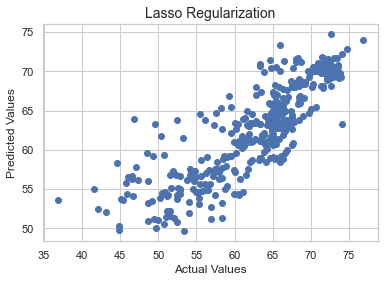

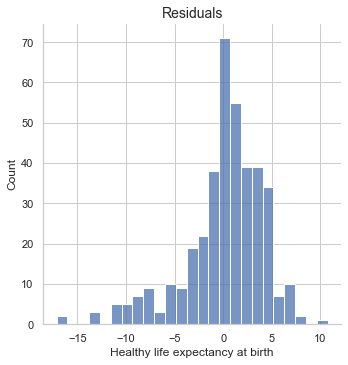

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_y_pred)))

plot_model(y_test,lasso_y_pred,'Lasso Regularization')
plt.show()

# Plotting Residuals
sns.displot((y_test - lasso_y_pred))
plt.title('Residuals',fontsize = 14)
plt.show()

#### Validation curve for Lasso Regularization 

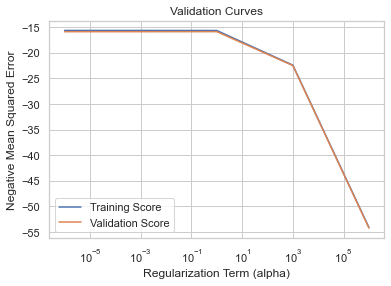

In [36]:
# Define the range of values for the regularization term
param_range = np.logspace(-6, 6, 5)

# Calculate the training and validation scores for different values of the regularization term
train_scores, valid_scores = validation_curve(ridge, X_train, y_train, param_name="alpha", param_range=param_range, cv=4, scoring="neg_mean_squared_error")

# Plot the validation curve
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(param_range, np.mean(valid_scores, axis=1), label="Validation Score")
plt.xscale("log")
plt.legend(loc="best")
plt.xlabel("Regularization Term (alpha)")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curves")
plt.show()

#### Learning Curve for Lasso Regularization 

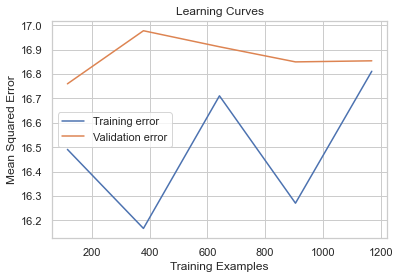

In [37]:
train_sizes, train_scores, test_scores = learning_curve(lasso, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

#### Lets change the penalty term __*alpha*__ for Lasso Regularization and see the Error changes that happen 

Lasso Regression R2 score for alpha 0.0: 0.7160449732498693
MAE: 2.891230255965633
MSE: 16.04685128934311
RMSE: 4.005852130239346



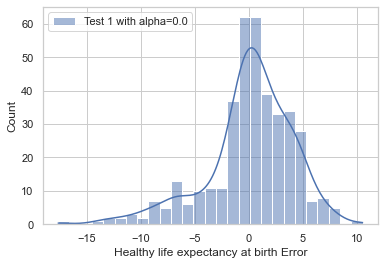

<Figure size 432x288 with 0 Axes>

Lasso Regression R2 score for alpha 0.2: 0.7041421456274539
MAE: 2.975732152076709
MSE: 16.71950324752682
RMSE: 4.088948917206819



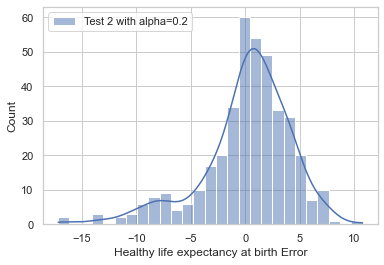

<Figure size 432x288 with 0 Axes>

Lasso Regression R2 score for alpha 0.4: 0.702644509060556
MAE: 2.989734175646621
MSE: 16.804137605120502
RMSE: 4.099285011452668



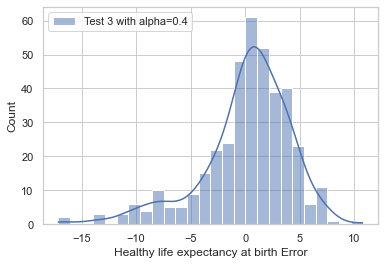

<Figure size 432x288 with 0 Axes>

Lasso Regression R2 score for alpha 0.7: 0.6981580195261372
MAE: 3.0267056534235817
MSE: 17.057677861808273
RMSE: 4.130094171058122



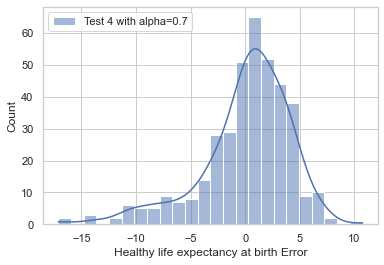

<Figure size 432x288 with 0 Axes>

Lasso Regression R2 score for alpha 1.0: 0.6909834883708325
MAE: 3.0827927160814497
MSE: 17.46312458285274
RMSE: 4.178890353054593



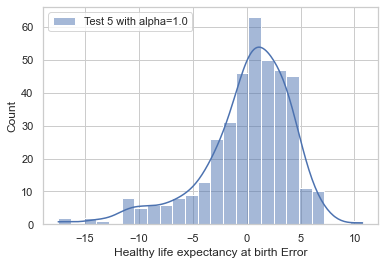

<Figure size 432x288 with 0 Axes>

In [38]:
alpha = [0.0,0.2,0.4,0.7,1.0]
for n,i in enumerate(alpha):
    lasso_dic = {}
    lasso_test = Lasso(alpha=i).fit(X_train, y_train)
    lasso_test_y_pred = lasso_test.predict(X_test)
    name = 'Test {} with alpha={}'.format(n+1,i)
    lasso_dic[name] = y_test-lasso_test_y_pred
    print('Lasso Regression R2 score for alpha {}: {}'.format(i, lasso_test.score(X_test, y_test)))
    print('MAE:', metrics.mean_absolute_error(y_test, lasso_test_y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, lasso_test_y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_test_y_pred)))
    print()
    lasso_df = pd.DataFrame(lasso_dic)
    sns.set(style="whitegrid")
#     plt.subplots(figsize=(14, 10))
    sns.histplot(lasso_df,kde=True)
    plt.xlabel('Healthy life expectancy at birth Error')
    plt.figure()
    plt.show()

####  Elastic Net regularization

In [39]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5).fit(X_train, y_train)
elastic_net_y_pred = elastic_net.predict(X_test)

print('Elastic Net Regression R2 score: ', elastic_net.score(X_test, y_test))
best_model['Name'].append('Elastic Net Regularization')
best_model['MSE'].append(metrics.mean_squared_error(y_test, elastic_net_y_pred))
best_model['R2 score'].append(elastic_net.score(X_test, y_test))
df = pd.DataFrame( data = elastic_net.coef_, columns = ['Coefficient'] ,index = X_train.columns)
df

Elastic Net Regression R2 score:  0.6795351614665123


,Coefficient
Log GDP per capita,4.367014
Social support,0.000000
Freedom to make life choices,0.000000
Generosity,0.000000
Perceptions of corruption,-0.000000
Positive affect,0.000000
Negative affect,0.000000


MAE: 3.166226189373341
MSE: 18.110091820756473
RMSE: 4.255595354442956


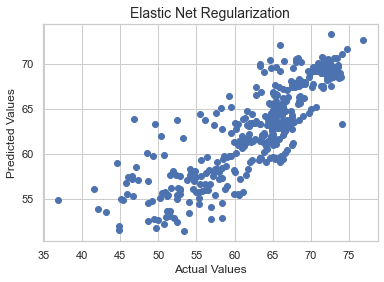

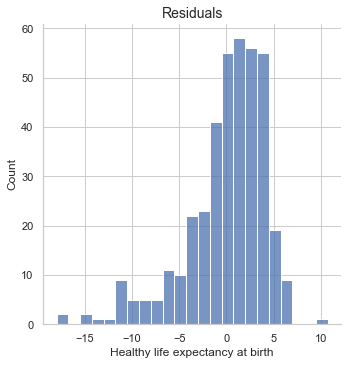

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, elastic_net_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, elastic_net_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net_y_pred)))

plot_model(y_test,elastic_net_y_pred,'Elastic Net Regularization')
plt.show()

# Plotting Residuals
sns.displot((y_test - elastic_net_y_pred))
plt.title('Residuals',fontsize = 14)
plt.show()

#### Validation Curve for Elastic-Net Regularization 

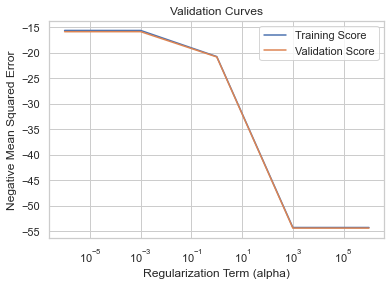

In [41]:
# Define the range of values for the regularization term
param_range = np.logspace(-6, 6, 5)

# Calculate the training and validation scores for different values of the regularization term
train_scores, valid_scores = validation_curve(elastic_net, X_train, y_train, param_name="alpha", param_range=param_range, cv=4, scoring="neg_mean_squared_error")

# Plot the validation curve
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(param_range, np.mean(valid_scores, axis=1), label="Validation Score")
plt.xscale("log")
plt.legend(loc="best")
plt.xlabel("Regularization Term (alpha)")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curves")
plt.show()

#### Learning Curve for Elastic-Net Regularization 

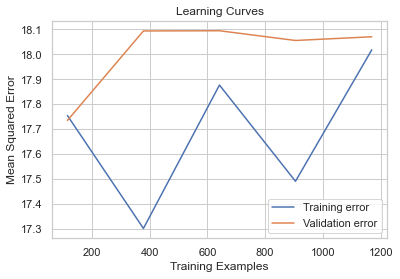

In [42]:
train_sizes, train_scores, test_scores = learning_curve(elastic_net, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

#### Lets change the penalty term __*alpha*__ and __*l1_ratio*__ for Elastic-Net Regularization and see the Error changes that happen  

Elastic-Net Regularization R2 score for alpha 0.0 and L1-ratio 1.0: 0.7160449732498693
MAE: 2.891230255965633
MSE: 16.04685128934311
RMSE: 4.005852130239346



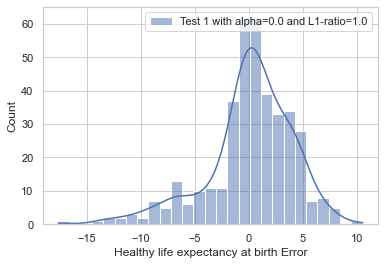

<Figure size 432x288 with 0 Axes>

Elastic-Net Regularization R2 score for alpha 0.2 and L1-ratio 0.7: 0.7021556431900904
MAE: 2.993741731607571
MSE: 16.831764367053825
RMSE: 4.102653332546368



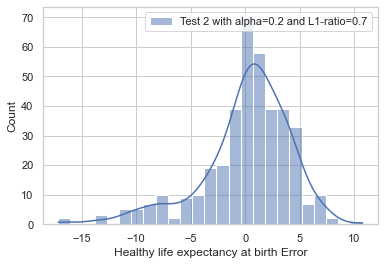

<Figure size 432x288 with 0 Axes>

Elastic-Net Regularization R2 score for alpha 0.4 and L1-ratio 0.4: 0.6836939720208257
MAE: 3.1367153524112497
MSE: 17.875069341072237
RMSE: 4.2278918317611005



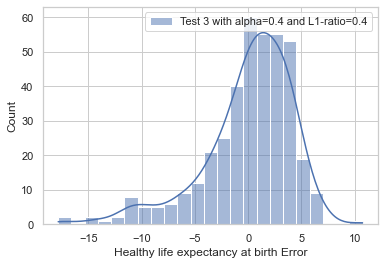

<Figure size 432x288 with 0 Axes>

Elastic-Net Regularization R2 score for alpha 0.7 and L1-ratio 0.2: 0.6354971733999504
MAE: 3.4450495224722313
MSE: 20.59876424777368
RMSE: 4.538586150749337



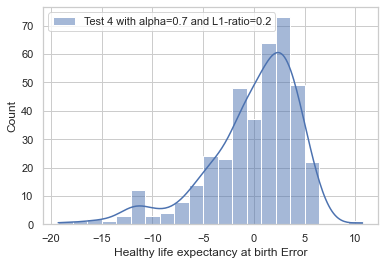

<Figure size 432x288 with 0 Axes>

Elastic-Net Regularization R2 score for alpha 1.0 and L1-ratio 0.0: 0.573594937350445
MAE: 3.7592676110071253
MSE: 24.096980101646636
RMSE: 4.908867496851656



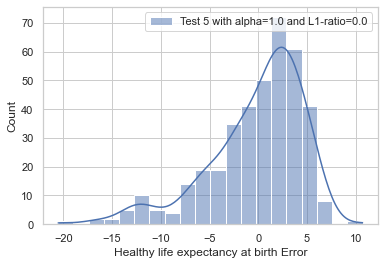

<Figure size 432x288 with 0 Axes>

In [43]:
alpha = [0.0,0.2,0.4,0.7,1.0]
l1_ratio = [1.0,0.7,0.4,0.2,0.0]
elastic_net_dic = {}
for n,i in enumerate(zip(alpha,l1_ratio)):
    elastic_net_dic = {}
    elastic_net_test = elastic_net = ElasticNet(alpha=i[0], l1_ratio=i[1]).fit(X_train, y_train)
    elastic_net_test_y_pred = elastic_net_test.predict(X_test)
    name = 'Test {} with alpha={} and L1-ratio={}'.format(n+1,i[0],i[1])
    elastic_net_dic[name] = y_test-elastic_net_test_y_pred
    print('Elastic-Net Regularization R2 score for alpha {} and L1-ratio {}: {}'.format(i[0], i[1], elastic_net_test.score(X_test, y_test)))
    print('MAE:', metrics.mean_absolute_error(y_test, elastic_net_test_y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, elastic_net_test_y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net_test_y_pred)))
    print()
    elastic_net_df = pd.DataFrame(elastic_net_dic)
    sns.set(style="whitegrid")
#     plt.subplots(figsize=(14, 10))
    sns.histplot(elastic_net_df,kde=True)
    plt.xlabel('Healthy life expectancy at birth Error')
    plt.figure()
    plt.show()

The __alpha__ parameter represents the penalty term for the regularization. The value of the penalty term determines the strength of the regularization. A smaller value of __alpha__ corresponds to a weaker regularization, while a larger value corresponds to a stronger regularization. The impact of the __alpha__ value can be observed by comparing the R2 scores of the models with different values of __alpha__.

The __l1_ratio__ parameter determines the balance between L1 and L2 regularization. A value of 0.0 corresponds to pure L2 regularization, while a value of 1.0 corresponds to pure L1 regularization.

By training the models with different values of __alpha__ and __l1_ratio__, we can observe the impact of these hyperparameters on the performance of the models.

We can also observe the training and validation loss as a function of training iterations by plotting the loss curve. This will help us to understand how the models are learning and how they converge to a minimum loss. 

## Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data.

# Polynomial Regression 

In [44]:
#trainig the model for Polynomial regression
X = new_data.drop('Healthy life expectancy at birth', axis=1)
y = new_data['Healthy life expectancy at birth']


In [45]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
# Generate polynomial features with degree 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [47]:
# Fit a linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [48]:
# Evaluate the model using mean squared error

scores = cross_val_score(model, X_train_poly, y_train, cv=4)
train_mse = np.mean((y_train - model.predict(X_train_poly))**2)
test_mse = np.mean((y_test - model.predict(X_test_poly))**2)
best_model['Name'].append('Polynomial Linear Regression')
best_model['MSE'].append(test_mse)
best_model['R2 score'].append(model.score(X_test_poly, y_test))
print("Polynomial Train data MSE:", train_mse)
print("Polynomial Test data MSE:", test_mse)
print("Mean Cross-Validation Score:", scores.mean())

Polynomial Train data MSE: 13.68929574376988
Polynomial Test data MSE: 14.8022919532874
Mean Cross-Validation Score: 0.7271390416824028


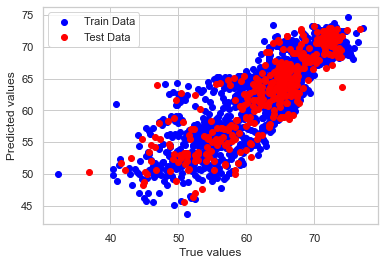

In [49]:
# Plot the model predictions against actual values
plt.scatter(y_train, model.predict(X_train_poly), color='blue', label='Train Data')
plt.scatter(y_test, model.predict(X_test_poly), color='red',label='Test Data')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.legend()
plt.show()

#### Train a polynomial regression model using the closed form solution (normal equation)

In [50]:
# Closed form solution (using the Normal Equation)
# Calculate the parameters of the model using the Normal Equation
# Train the polynomial regression model using the closed form solution (normal equation)

# Train the polynomial regression model using the closed form solution (normal equation)
theta_train = np.linalg.inv(X_train_poly.T.dot(X_train_poly)).dot(X_train_poly.T).dot(y_train)

# Train the polynomial regression model using the closed form solution (normal equation)
theta_test = np.linalg.inv(X_test_poly.T.dot(X_test_poly)).dot(X_test_poly.T).dot(y_test)

# Make predictions on the training data
y_pred_train = X_train_poly.dot(theta_train)
y_pred_test = X_test_poly.dot(theta_test)

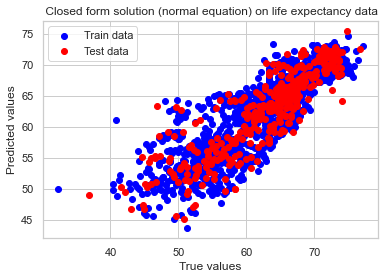

In [51]:
#Plot the True and predicted values of closed form solution
plt.scatter(y_train, y_pred_train, color='blue', label='Train data')
plt.scatter(y_test, y_pred_test, color='red', label='Test data')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title(" Closed form solution (normal equation) on life expectancy data")
plt.legend()
plt.show()

MAE: 2.6222498985473037
MSE: 13.4975173302108
RMSE: 3.6738967500748845


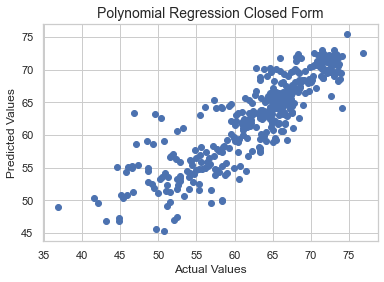

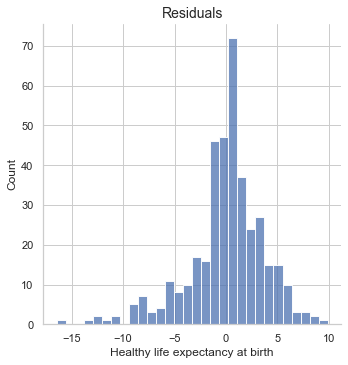

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

best_model['Name'].append('Polynomial Regression Closed Form')
best_model['MSE'].append(metrics.mean_squared_error(y_test, y_pred_test))
best_model['R2 score'].append(model.score(X_test_poly, y_test))

plot_model(y_test,y_pred_test,'Polynomial Regression Closed Form')
plt.show()

# Plotting Residuals
sns.displot((y_test - y_pred_test))
plt.title('Residuals',fontsize = 14)
plt.show()

In [53]:
# Perform 4-fold cross-validation on the linear regression model
cv_scores = cross_val_score(model, X_train_poly, y_train, cv=4)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.77081705 0.74816986 0.70535448 0.68421478]
Mean cross-validation score: 0.7271390416824028


#### Learning Curve for Closed form Polynomial Regression

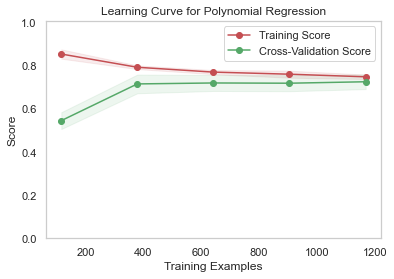

In [54]:
from sklearn.pipeline import make_pipeline
# Create a polynomial regression model using the normal equation
polynomial_regression = make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept=False))

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(polynomial_regression, X_train, y_train, cv=4)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve for Polynomial Regression")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.ylim((0.0, 1.01))
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

In [55]:
# Compute the training and validation loss
y_train_pred = model.predict(X_train_poly)
y_val_pred = model.predict(X_test_poly)
train_loss = mean_squared_error(y_train, y_train_pred)
val_loss = mean_squared_error(y_test, y_val_pred)
print("Validation loss of the lm_poly is: ",val_loss)
print("Training loss of the lm_poly is: ",train_loss)

Validation loss of the lm_poly is:  14.8022919532874
Training loss of the lm_poly is:  13.689295743769884


# Stochastic gradient descent

In [56]:
# Fit a SGD model with polynomial features
sgd_model = SGDRegressor()
sgd_model.fit(X_train_poly, y_train)

SGDRegressor()

In [57]:
# Evaluate the SGD model using mean squared error
sgd_train_mse = np.mean((y_train - sgd_model.predict(X_train_poly))**2)
sgd_test_mse = np.mean((y_test - sgd_model.predict(X_test_poly))**2)
print("SGD Train MSE:", sgd_train_mse)
print("SGD Test MSE:", sgd_test_mse)

best_model['Name'].append('Polynomial SGD')
best_model['MSE'].append(sgd_test_mse)
best_model['R2 score'].append(sgd_model.score(X_test_poly, y_test))

SGD Train MSE: 6.251514376282775e+24
SGD Test MSE: 5.884061414970567e+24


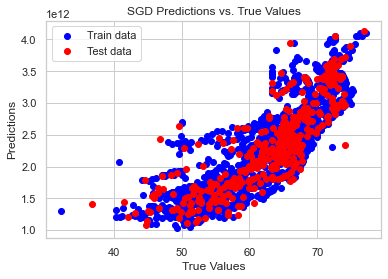

In [58]:
# Plot the SGD predictions vs. the true values
plt.scatter(y_train, sgd_model.predict(X_train_poly), color='blue', label='Train data')
plt.scatter(y_test, sgd_model.predict(X_test_poly), color='red', label='Test data')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("SGD Predictions vs. True Values")
plt.legend()
plt.show()

#### 4-fold cross validation on SGD Regressor (Stochastic Gradient Descent)

In [59]:
scores = cross_val_score(sgd_model, X_train_poly, y_train, cv=4)
print("SGD - Cross validation scores:", scores)
print("SGD - Mean cross-validation score:", np.mean(scores))

SGD - Cross validation scores: [-5.01776010e+23 -1.67273148e+22 -3.73275522e+21 -2.84477760e+22]
SGD - Mean cross-validation score: -1.3767096388746305e+23


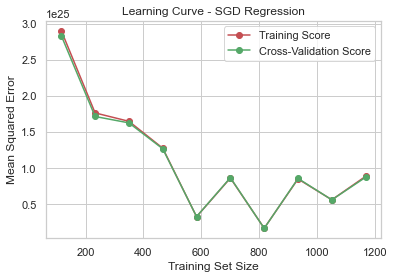

In [60]:
# Train an SGD model using closed form
sgd = SGDRegressor(loss='squared_loss', penalty='none', max_iter=10000, tol=1e-5)

# Use learning_curve to obtain the training and validation score
train_sizes, train_scores, val_scores = learning_curve(sgd_model, X_train_poly, y_train, scoring='neg_mean_squared_error', cv=4, train_sizes=np.linspace(0.1, 1, 10))

# Plot the learning curve
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve - SGD Regression")
plt.show()

To explore if your model overfits or underfits the data, we have to compare the validation loss with the training loss. If the validation loss is significantly higher than the training loss, it is an indication that the model is overfitting the data and is not generalizing well to new, unseen data. On the other hand, if the validation loss is significantly lower than the training loss, it is an indication that the model is underfitting the data and is not capturing the underlying pattern in the data well enough.

In [61]:
# Compute the training and validation loss
y_train_pred = sgd_model.predict(X_train_poly)
y_val_pred = sgd_model.predict(X_test_poly)
train_loss = mean_squared_error(y_train, y_train_pred)
val_loss = mean_squared_error(y_test, y_val_pred)
print("Validation loss of the model is: ",val_loss)
print("Training loss of the model is: ",train_loss)

Validation loss of the model is:  5.884061414970568e+24
Training loss of the model is:  6.251514376282775e+24


If the validation loss is close to the training loss, it means that the model has neither overfitted nor underfitted the data. This is because the validation loss represents the performance of the model on unseen data, while the training loss represents the performance of the model on the training data. When the validation loss is almost equal to the training loss, it indicates that the model has learned the underlying pattern in the data well and is able to generalize well to new data. This is a desirable property for a machine learning model, as it means that the model is not too complex and not too simple, but is able to make accurate predictions on both the training and validation data.

#### Perform Ridge regularization

In [62]:
from sklearn.linear_model import Ridge

ridge_poly = Ridge(alpha=0.5,fit_intercept=True).fit(X_train_poly, y_train)
ridge_poly_y_pred = ridge_poly.predict(X_test_poly)

print('Ridge Regression R2 score:', ridge_poly.score(X_test_poly, y_test))
# df = pd.DataFrame( data = ridge_poly.coef_, columns = ['Coefficient'] ,index = X_train.columns)
# df
print('Ridge Regression Coefficient:')
print(ridge_poly.coef_)

Ridge Regression R2 score: 0.7342921094084274
Ridge Regression Coefficient:
[  0.          10.82689113  -5.73084124   7.63204233  -2.164823
 -10.64529815   0.25424613  -3.63530319  -0.35095641   1.60631056
  -2.92689168  -1.09773764   2.0178021   -0.63769672   0.54605674
  -0.47397642   6.36318745  13.76085484 -10.96767844   2.37125975
   4.07068272  11.35553269   0.09695741  -2.05715017   3.63452367
   1.64139378  -1.18356604   6.14990325  -3.13074071  -4.61280688
  -0.59856825  -2.09439861   4.29791869   3.48930755   3.58913883
  -7.44310491]


MAE: 2.803845623932844
MSE: 15.015670106379096
RMSE: 3.875005820173577


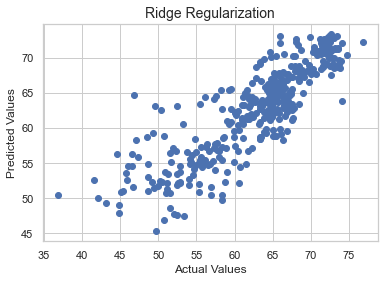

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, ridge_poly_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_poly_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_poly_y_pred)))
best_model['Name'].append('Polynomial Ridge Regularization')
best_model['MSE'].append(metrics.mean_squared_error(y_test, ridge_poly_y_pred))
best_model['R2 score'].append(ridge_poly.score(X_test_poly, y_test))
plot_model(y_test,ridge_poly_y_pred,'Ridge Regularization')

#### Validation curve for Ridge Regularization 

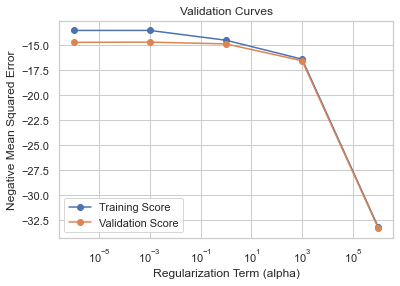

In [64]:
from sklearn.model_selection import validation_curve

# Define the range of values for the regularization term
param_range = np.logspace(-6, 6, 5)

# Calculate the training and validation scores for different values of the regularization term
train_scores, valid_scores = validation_curve(ridge_poly, X_train_poly, y_train, param_name="alpha", param_range=param_range, cv=4, scoring="neg_mean_squared_error")

# Plot the validation curve
plt.plot(param_range, np.mean(train_scores, axis=1),'o-', label="Training Score")
plt.plot(param_range, np.mean(valid_scores, axis=1),'o-', label="Validation Score")
plt.xscale("log")
plt.legend(loc="best")
plt.xlabel("Regularization Term (alpha)")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curves")
plt.show()

#### Learning Curve for Ridge Regularization 

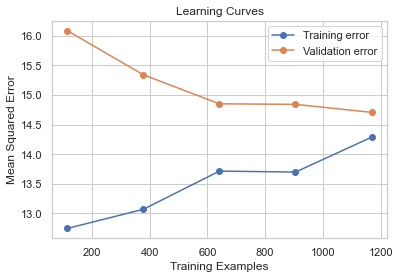

In [65]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(ridge_poly, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean,'o-', label = 'Training error')
plt.plot(train_sizes, test_scores_mean,'o-', label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

#### Lets change the penalty term __*alpha*__ for Ridge Regularization and see the Error changes that happen 

Ridge Regularization R2 score for alpha 0.0: 0.7378175124802964
MAE: 2.801401910892697
MSE: 14.81644271647606
RMSE: 3.8492132594175734



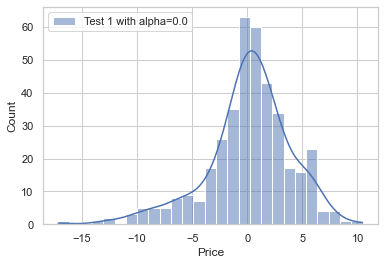

<Figure size 432x288 with 0 Axes>

Ridge Regularization R2 score for alpha 0.2: 0.7370057457423238
MAE: 2.794279204637845
MSE: 14.862317234969245
RMSE: 3.855167601411026



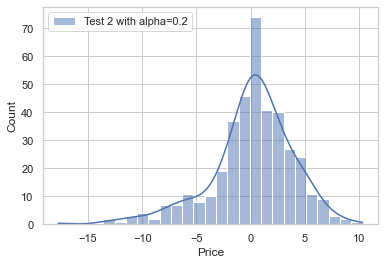

<Figure size 432x288 with 0 Axes>

Ridge Regularization R2 score for alpha 0.4: 0.7350419480530099
MAE: 2.8017876133674435
MSE: 14.973295264988431
RMSE: 3.869534243935364



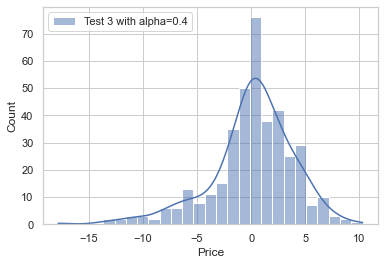

<Figure size 432x288 with 0 Axes>

Ridge Regularization R2 score for alpha 0.7: 0.733069161293812
MAE: 2.8067540437797223
MSE: 15.084781284844281
RMSE: 3.8839131407440464



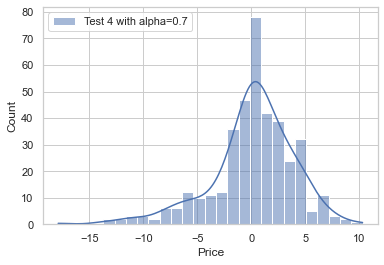

<Figure size 432x288 with 0 Axes>

Ridge Regularization R2 score for alpha 1.0: 0.7316588135455528
MAE: 2.8132782462621604
MSE: 15.16448278138616
RMSE: 3.894160086769182



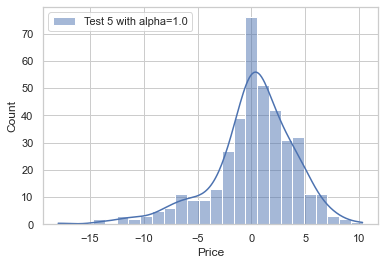

<Figure size 432x288 with 0 Axes>

In [66]:
alpha = [0.0,0.2,0.4,0.7,1.0]
for n,i in enumerate(alpha):
    ridge_poly_dic = {}
    ridge_poly_test = Ridge(alpha=i,fit_intercept=True).fit(X_train_poly, y_train)
    ridge_poly_test_y_pred = ridge_poly_test.predict(X_test_poly)
    name = 'Test {} with alpha={}'.format(n+1,i)
    ridge_poly_dic[name] = y_test-ridge_poly_test_y_pred
    print('Ridge Regularization R2 score for alpha {}: {}'.format(i, ridge_poly_test.score(X_test_poly, y_test)))
    print('MAE:', metrics.mean_absolute_error(y_test, ridge_poly_test_y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, ridge_poly_test_y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_poly_test_y_pred)))
    print()
    ridge_poly_df = pd.DataFrame(ridge_poly_dic)
    sns.set(style="whitegrid")
#     plt.subplots(figsize=(14, 10))
    sns.histplot(ridge_poly_df,kde=True)
    plt.xlabel('Price')
    plt.figure()
    plt.show()

#### Lasso regularization 

In [67]:
from sklearn.linear_model import Lasso

lasso_poly = Lasso(alpha=0.5).fit(X_train_poly, y_train)
lasso_poly_y_pred = lasso_poly.predict(X_test_poly)

print('Lasso Regression R2 score:', lasso_poly.score(X_test_poly, y_test))
print('Ridge Regression Coefficient:')
print(lasso_poly.coef_)

Lasso Regression R2 score: 0.6964445863917768
Ridge Regression Coefficient:
[ 0.          0.          0.          0.         -0.         -0.
  0.          0.          0.28087323  0.          0.13589899 -0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.        ]


MAE: 3.028259371170748
MSE: 17.15450730348429
RMSE: 4.141800007663853


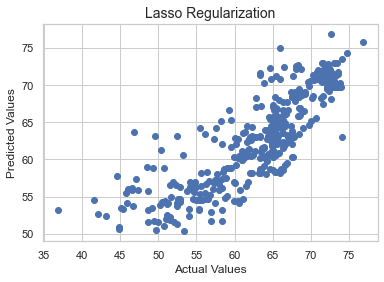

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso_poly_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_poly_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_poly_y_pred)))
best_model['Name'].append('Polynomial Lasso Regularization')
best_model['MSE'].append(metrics.mean_squared_error(y_test, lasso_poly_y_pred))
best_model['R2 score'].append(lasso_poly.score(X_test_poly, y_test))
plot_model(y_test,lasso_poly_y_pred,'Lasso Regularization')

#### Validation curve for Lasso Regularization 

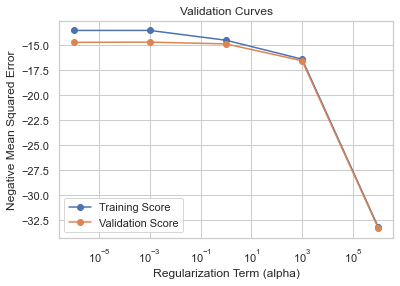

In [69]:
# Define the range of values for the regularization term
param_range = np.logspace(-6, 6, 5)

# Calculate the training and validation scores for different values of the regularization term
train_scores, valid_scores = validation_curve(ridge_poly, X_train_poly, y_train, param_name="alpha", param_range=param_range, cv=4, scoring="neg_mean_squared_error")

# Plot the validation curve
plt.plot(param_range, np.mean(train_scores, axis=1),'o-', label="Training Score")
plt.plot(param_range, np.mean(valid_scores, axis=1),'o-', label="Validation Score")
plt.xscale("log")
plt.legend(loc="best")
plt.xlabel("Regularization Term (alpha)")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curves")
plt.show()

#### Learning Curve for Lasso Regularization 

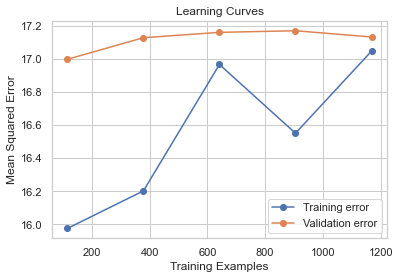

In [70]:
train_sizes, train_scores, test_scores = learning_curve(lasso_poly, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean,'o-', label = 'Training error')
plt.plot(train_sizes, test_scores_mean,'o-', label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

#### Lets change the penalty term __*alpha*__ for Lasso Regularization and see the Error changes that happen 

Lasso Regression R2 score for alpha 0.0: 0.7372993836054866
MAE: 2.8112364219617247
MSE: 14.845723187746259
RMSE: 3.853014818002425



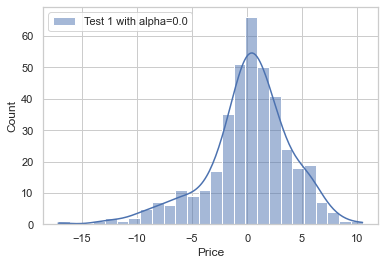

<Figure size 432x288 with 0 Axes>

Lasso Regression R2 score for alpha 0.2: 0.7048851882928
MAE: 2.955811824070854
MSE: 16.6775124601514
RMSE: 4.083811021601195



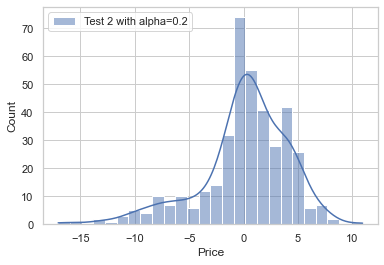

<Figure size 432x288 with 0 Axes>

Lasso Regression R2 score for alpha 0.4: 0.6974488537755859
MAE: 3.0213121430231835
MSE: 17.097754198786127
RMSE: 4.13494307080353



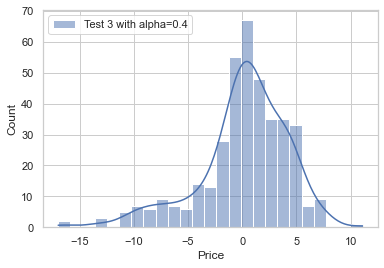

<Figure size 432x288 with 0 Axes>

Lasso Regression R2 score for alpha 0.7: 0.6944274978933027
MAE: 3.041990139144835
MSE: 17.26849690086142
RMSE: 4.155538100037277



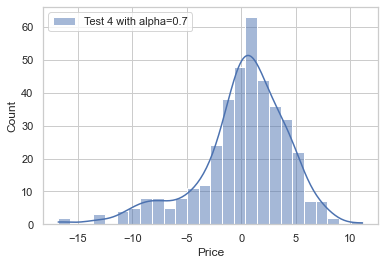

<Figure size 432x288 with 0 Axes>

Lasso Regression R2 score for alpha 1.0: 0.6941611588153367
MAE: 3.0436657619029495
MSE: 17.283548240594953
RMSE: 4.157348703271708



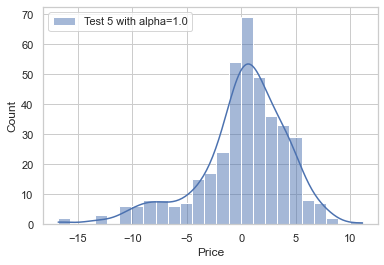

<Figure size 432x288 with 0 Axes>

In [71]:
alpha = [0.0,0.2,0.4,0.7,1.0]

for n,i in enumerate(alpha):
    lasso_poly_dic = {}
    lasso_poly_test = Lasso(alpha=i).fit(X_train_poly, y_train)
    lasso_poly_test_y_pred = lasso_poly_test.predict(X_test_poly)
    name = 'Test {} with alpha={}'.format(n+1,i)
    lasso_poly_dic[name] = y_test-lasso_poly_test_y_pred
    print('Lasso Regression R2 score for alpha {}: {}'.format(i, lasso_poly_test.score(X_test_poly, y_test)))
    print('MAE:', metrics.mean_absolute_error(y_test, lasso_poly_test_y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, lasso_poly_test_y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_poly_test_y_pred)))
    print()
    lasso_poly_df = pd.DataFrame(lasso_poly_dic)
    sns.set(style="whitegrid")
#     plt.subplots(figsize=(14, 10))
    sns.histplot(lasso_poly_df,kde=True)
    plt.xlabel('Price')
    plt.figure()
    plt.show()

####  Elastic Net regularization

In [72]:
from sklearn.linear_model import ElasticNet

elastic_net_poly = ElasticNet(alpha=0.5, l1_ratio=0.5).fit(X_train_poly, y_train)
elastic_net_poly_y_pred = elastic_net_poly.predict(X_test_poly)

print('Elastic Net Regression R2 score: ', elastic_net_poly.score(X_test_poly, y_test))
# df = pd.DataFrame( data = elastic_net_poly.coef_, columns = ['Coefficient'] ,index = X_train.columns)
# df
print('Elastic Net Regression Coefficient:')
print(elastic_net_poly.coef_)

Elastic Net Regression R2 score:  0.701126658275287
Elastic Net Regression Coefficient:
[ 0.          0.          0.          0.         -0.         -0.
  0.          0.          0.25320224  0.209323    0.1956607  -0.
  0.          0.1287579   0.17305357  0.          0.         -0.
  0.          0.          0.          0.         -0.          0.
  0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.        ]


MAE: 2.9844162875685236
MSE: 16.889914307541964
RMSE: 4.109734092072377


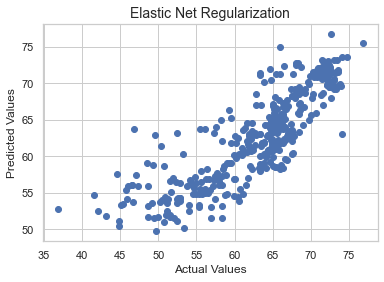

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, elastic_net_poly_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, elastic_net_poly_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net_poly_y_pred)))
best_model['Name'].append('Polynomial Elastic Net Regularization')
best_model['MSE'].append(metrics.mean_squared_error(y_test, elastic_net_poly_y_pred))
best_model['R2 score'].append(elastic_net_poly.score(X_test_poly, y_test))
plot_model(y_test,elastic_net_poly_y_pred,'Elastic Net Regularization')


#### Validation Curve for Elastic-Net Regularization 

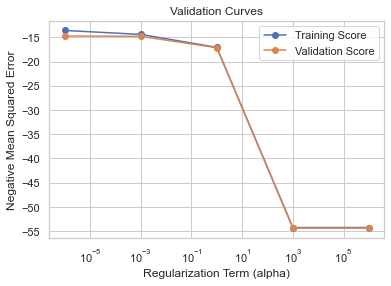

In [74]:
# Define the range of values for the regularization term
param_range = np.logspace(-6, 6, 5)

# Calculate the training and validation scores for different values of the regularization term
train_scores, valid_scores = validation_curve(elastic_net_poly, X_train_poly, y_train, param_name="alpha", param_range=param_range, cv=4, scoring="neg_mean_squared_error")

# Plot the validation curve
plt.plot(param_range, np.mean(train_scores, axis=1),'o-', label="Training Score")
plt.plot(param_range, np.mean(valid_scores, axis=1),'o-', label="Validation Score")
plt.xscale("log")
plt.legend(loc="best")
plt.xlabel("Regularization Term (alpha)")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curves")
plt.show()

#### Learning Curve for Elastic-Net Regularization 

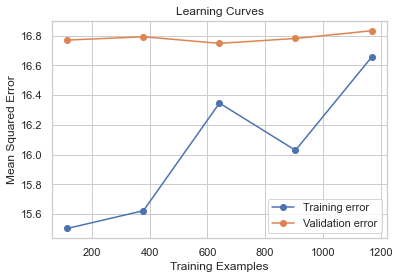

In [75]:
train_sizes, train_scores, test_scores = learning_curve(elastic_net_poly, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean,'o-', label = 'Training error')
plt.plot(train_sizes, test_scores_mean,'o-', label = 'Validation error')
plt.legend()
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.show()

#### Lets change the penalty term __*alpha*__ and __*l1_ratio*__ for Elastic-Net Regularization and see the Error changes that happen  

Elastic-Net Regularization R2 score for alpha 0.0 and L1-ratio 1.0: 0.7372993836054866
MAE: 2.8112364219617247
MSE: 14.845723187746259
RMSE: 3.853014818002425



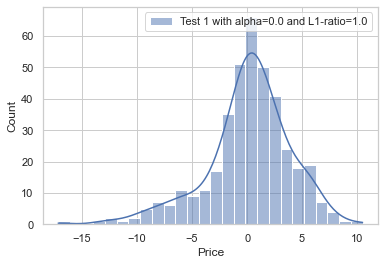

<Figure size 432x288 with 0 Axes>

Elastic-Net Regularization R2 score for alpha 0.2 and L1-ratio 0.7: 0.7056727756996877
MAE: 2.9529040455116724
MSE: 16.633004362723685
RMSE: 4.078358047391583



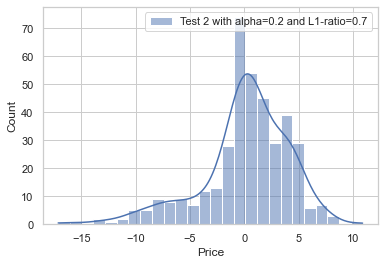

<Figure size 432x288 with 0 Axes>

Elastic-Net Regularization R2 score for alpha 0.4 and L1-ratio 0.4: 0.7036213294329039
MAE: 2.963804073629654
MSE: 16.748935584466494
RMSE: 4.092546344815962



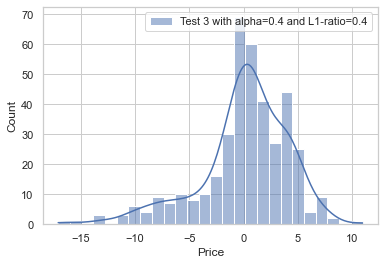

<Figure size 432x288 with 0 Axes>

Elastic-Net Regularization R2 score for alpha 0.7 and L1-ratio 0.2: 0.7022405702565222
MAE: 2.973560477523162
MSE: 16.82696497321647
RMSE: 4.102068377442832



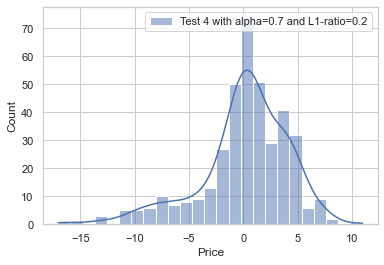

<Figure size 432x288 with 0 Axes>

Elastic-Net Regularization R2 score for alpha 1.0 and L1-ratio 0.0: 0.7030970281427634
MAE: 2.9694056344505637
MSE: 16.778564870941846
RMSE: 4.096164653787961



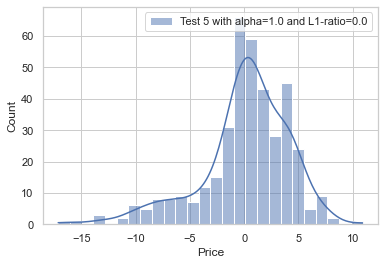

<Figure size 432x288 with 0 Axes>

In [76]:
alpha = [0.0,0.2,0.4,0.7,1.0]
l1_ratio = [1.0,0.7,0.4,0.2,0.0]
elastic_net_poly_dic = {}
for n,i in enumerate(zip(alpha,l1_ratio)):
    elastic_net_poly_dic = {}
    elastic_net_poly_test = ElasticNet(alpha=i[0], l1_ratio=i[1]).fit(X_train_poly, y_train)
    elastic_net_poly_test_y_pred = elastic_net_poly_test.predict(X_test_poly)
    name = 'Test {} with alpha={} and L1-ratio={}'.format(n+1,i[0],i[1])
    elastic_net_poly_dic[name] = y_test-elastic_net_poly_test_y_pred
    print('Elastic-Net Regularization R2 score for alpha {} and L1-ratio {}: {}'.format(i[0], i[1], elastic_net_poly_test.score(X_test_poly, y_test)))
    print('MAE:', metrics.mean_absolute_error(y_test, elastic_net_poly_test_y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, elastic_net_poly_test_y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net_poly_test_y_pred)))
    print()
    elastic_net_poly_df = pd.DataFrame(elastic_net_poly_dic)
    sns.set(style="whitegrid")
#     plt.subplots(figsize=(14, 10))
    sns.histplot(elastic_net_poly_df,kde=True)
    plt.xlabel('Price')
    plt.figure()
    plt.show()

#### MSE and R2 score of all the models

In [77]:
df = pd.DataFrame(best_model)
df

,Name,MSE,R2 score
0,Linear Regression,1.604685e+01,7.160450e-01
1,SGD,1.672943e+01,7.039665e-01
2,Ridge Regularization,1.603970e+01,7.161714e-01
3,Lasso Regularization,1.687177e+01,7.014477e-01
4,Elastic Net Regularization,1.811009e+01,6.795352e-01
5,Polynomial Linear Regression,1.480229e+01,7.380679e-01
6,Polynomial Regression Closed Form,1.349752e+01,7.380679e-01
7,Polynomial SGD,5.884061e+24,-1.041207e+23
8,Polynomial Ridge Regularization,1.501567e+01,7.342921e-01
9,Polynomial Lasso Regularization,1.715451e+01,6.964446e-01


## Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.  

#### Considering Linear regression with Ridge Regularization with alpha = 0.5

In [78]:
ridge_final = Ridge(alpha=0.5)
r_reg = ridge_final.fit(X_train,y_train)
predictions = r_reg.predict(X_test)

In [79]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print("Root Mean Squared Error:", rmse)
print('R2 Score:', r_reg.score(X_test, y_test))

Mean Squared Error: 16.039703886636516
Root Mean Squared Error: 4.004959910740245
R2 Score: 0.7161714492101775


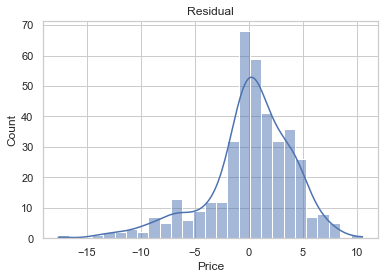

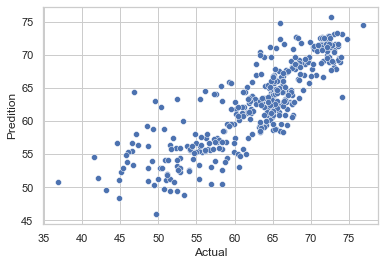

In [80]:
sns.histplot(y_test - predictions,kde=True)
plt.xlabel('Price')
plt.title('Residual')
plt.show()
sns.scatterplot(y_test,predictions)
plt.xlabel('Actual')
plt.ylabel('Predition')
plt.show()

References: https://amete.github.io/DataSciencePortfolio/Udemy/Python-DS-and-ML-Bootcamp/Linear_Regression_Project.html